## Постановка задачи
Всего 3 набора данных: (1) building_metadata, (2) train и (3) weather_train
* (1) содержит building_id, для которого есть данные (2)
* (1) содержит site_id, для которого есть данные (3)

Нужно объединить все наборы данных по building_id, site_id и timestamp
ETL = получение + очистка + совмещение данных

Данные:
* http://video.ittensive.com/machine-learning/ashrae/building_metadata.csv.gz
* http://video.ittensive.com/machine-learning/ashrae/weather_train.csv.gz
* http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz

**Соревнование: https://www.kaggle.com/c/ashrae-energy-prediction/**

© ITtensive, 2020

### Подключение библиотек

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 6

### Загрузка данных: здания
* primary_use - назначение
* square_feet - площадь, кв.футы
* year_built - год постройки
* floor_count - число этажей

In [2]:
buildings = pd.read_csv('http://video.ittensive.com/machine-learning/ashrae/building_metadata.csv.gz')
buildings.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


### Загрузка данных: погода
* air_temperature - температура воздуха, С
* dew_temperature - точка росы (влажность), С
* cloud_coverage - облачность, %
* precip_depth_1_hr - количество осадков, мм/час
* sea_level_pressure - давление, мбар
* wind_direction - направление ветра, градусы
* wind_speed - скорость ветра, м/с

In [3]:
weather = pd.read_csv('http://video.ittensive.com/machine-learning/ashrae/weather_train.csv.gz')
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


### Загрузка данных: потребление энергии здания 0
* meter_reading - значение показателя (TOE, эквивалент тонн нефти)

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            0      0  2016-01-01 01:00:00            0.0
2            0      0  2016-01-01 02:00:00            0.0
3            0      0  2016-01-01 03:00:00            0.0
4            0      0  2016-01-01 04:00:00            0.0


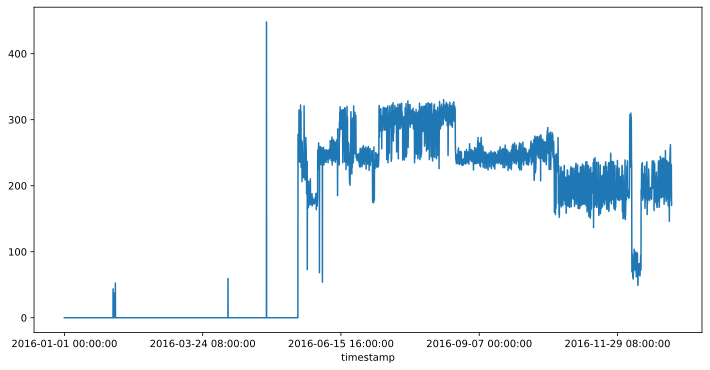

In [4]:
energy_0 = pd.read_csv('http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz')
print(energy_0.head())
energy_0.set_index('timestamp')['meter_reading'].plot();

### Объединение потребления энергии и информацию о здании
Проводим объединение по building_id

In [5]:
energy_0 = pd.merge(left=energy_0, right=buildings, how='left', left_on='building_id', right_on='building_id')
energy_0.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,0,0,2016-01-01 01:00:00,0.0,0,Education,7432,2008.0,NaN
2,0,0,2016-01-01 02:00:00,0.0,0,Education,7432,2008.0,NaN
3,0,0,2016-01-01 03:00:00,0.0,0,Education,7432,2008.0,NaN
4,0,0,2016-01-01 04:00:00,0.0,0,Education,7432,2008.0,NaN


### Объединение потребления энергии и погоды
Выставим индексы для объединения - timestamp, site_id

In [6]:
energy_0.set_index(['timestamp', 'site_id'], inplace=True)
weather.set_index(['timestamp', 'site_id'], inplace=True)

Проведем объединение и сбросим индексы

In [7]:
energy_0 = pd.merge(left=energy_0, right=weather, how='left', left_index=True, right_index=True)
energy_0.reset_index(inplace=True)
energy_0.head()

,timestamp,site_id,building_id,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,0,0,0,0.0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,2016-01-01 01:00:00,0,0,0,0.0,Education,7432,2008.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,2016-01-01 02:00:00,0,0,0,0.0,Education,7432,2008.0,NaN,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,2016-01-01 03:00:00,0,0,0,0.0,Education,7432,2008.0,NaN,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,2016-01-01 04:00:00,0,0,0,0.0,Education,7432,2008.0,NaN,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


### Нахождение пропущенных данных для их дальнейшего заполнения
Посчитаем количество пропусков данных по столбцам

In [8]:
for column in energy_0.columns:
    energy_nulls = energy_0[column].isnull().sum()
    if energy_nulls > 0:
        print(column + ': ' + str(energy_nulls))

energy_0[energy_0['precip_depth_1_hr'].isnull()] # пример записи с отсутствующими данными

floor_count: 8784
air_temperature: 3
cloud_coverage: 3830
dew_temperature: 3
precip_depth_1_hr: 1
sea_level_pressure: 85
wind_direction: 250


,timestamp,site_id,building_id,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,0,0,0,0.0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


### Заполнение пропущенных данных
* air_temperature: NaN -> 0
* cloud_coverage: NaN -> 0
* dew_temperature: NaN -> 0
* precip_depth_1_hr: NaN -> 0, -1 -> 0
* sea_level_pressure: NaN -> среднее
* wind_direction: NaN -> среднее (роза ветров)

In [9]:
energy_0["air_temperature"].fillna(0, inplace=True)
energy_0["cloud_coverage"].fillna(0, inplace=True)
energy_0["dew_temperature"].fillna(0, inplace=True)
energy_0["precip_depth_1_hr"] = energy_0["precip_depth_1_hr"].apply(lambda x:x if x>0 else 0)
energy_0_sea_level_pressure_mean = energy_0["sea_level_pressure"].mean()
energy_0["sea_level_pressure"] = energy_0["sea_level_pressure"].apply(lambda x:energy_0_sea_level_pressure_mean if x!=x else x)
energy_0_wind_direction_mean = energy_0["wind_direction"].mean()
energy_0["wind_direction"] = energy_0["wind_direction"].apply(lambda x:energy_0_wind_direction_mean if x!=x else x)
energy_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           8784 non-null   object 
 1   site_id             8784 non-null   int64  
 2   building_id         8784 non-null   int64  
 3   meter               8784 non-null   int64  
 4   meter_reading       8784 non-null   float64
 5   primary_use         8784 non-null   object 
 6   square_feet         8784 non-null   int64  
 7   year_built          8784 non-null   float64
 8   floor_count         0 non-null      float64
 9   air_temperature     8784 non-null   float64
 10  cloud_coverage      8784 non-null   float64
 11  dew_temperature     8784 non-null   float64
 12  precip_depth_1_hr   8784 non-null   float64
 13  sea_level_pressure  8784 non-null   float64
 14  wind_direction      8784 non-null   float64
 15  wind_speed          8784 non-null   float64
dtypes: flo